# Mandatory assigment GEO2310: Thermodynamics

This assignment is somewhat programming heavy, so some of you might find it challenging and some of you might find it pretty strait forewards. Both is fine! The best thing to do if you find it hard, is to remember that programming is a very important skill going forewards with your studies and very possibly your working life. So spending some time brushing up is a very good idea! 

### Contact person:
Sara Blichner [s.m.blichner@geo.uio.no](s.m.blichner@geo.uio.no)

Please feel free to contact me if anything is unclear or if you need help with the assignment. Especially if you feel like this is super difficult -- please contact me! **We will make it work :)**

### Hand in:
- One pdf with your results
- All your code either as scripts (well documented) or as a notebook. 
- Make sure to comment on your results.
- Add titles and axis labels to your figures (plt.title('title') etc)
- Please try to make your report as tidy and easy to read as possible :)
    - Make sure you are easy to read -- read through your answer and make sure you understand what you meant (if not the chances that I will are slim
    - Use proper sentences ("x increases" but "we see that x increases with time" e.g.)

### A very small python class introduction

We will be using a python class to write the model. A class can be described as the programming version of "a type of thing". Much like a human could be an instance of the class human beings, the individual instances of a python class might have different attributes (e.g. human names) and give you different responses when asked to perform certain tasks (e.g. conversation). 

_Example:_ If you have ever used the package numpy, you might (or might not) know, that the numpy n dimension array "ndarray" is a class. It has some attributes like "shape", "dtype" (the data type) and it has some methods, like "sum" or "max"/"min". 

In [1]:
import numpy as np
   
a = np.array([[1, 2, 3], [4, 5, 6]])  # creates an object of the numpy ndarray class
print(type(a))

<class 'numpy.ndarray'>


In [2]:
a.sum()  # .sum is a method of the ndarray class

21

In [3]:
a.shape  # .shape is an attribute of the ndarray class

(2, 3)

In [4]:
class Human:
    def __init__(self, name, email):
        self.name = name  # set attributes
        self.email = email
        return

    def say_hi_to(self, name_other):  # this is a class method
        print('Hi %s, my name is %s!\n My email is %s' % (name_other, self.name, self.email))

In [5]:
sara = Human("Sara", "s.m.blichner@geo.uio.no")

In [6]:
sara.name  # Get attribute

'Sara'

In [7]:
sara.say_hi_to('students')  # call method

Hi students, my name is Sara!
 My email is s.m.blichner@geo.uio.no


#### Make a subclass

A subclass inherets everything from the parent class (here Human) -- unless the specific attribute or method is overwritten in the subclass. 

In [8]:
class Student(Human):
    def __init__(self, name, email, student_id,
                 institution='UiO'):
        # notice the default argument here --
        # if nothing else is specified the institution will be UiO
        self.student_id = student_id
        self.institution = institution
        super().__init__(name, email)

    def present_myself(self):
        print('Hi all, my name is %s and I am a student here at %s! \
            \n My email is %s and my student id is %s'
              % (self.name, self.institution, self.email, self.student_id))


student = Student('Ola', 'ola@uio.no', 9999)
print(student.name)
student.say_hi_to('Sara')

Ola
Hi Sara, my name is Ola!
 My email is ola@uio.no


In [9]:
student.present_myself()

Hi all, my name is Ola and I am a student here at UiO!             
 My email is ola@uio.no and my student id is 9999


## Model introduction:

In the atmosphere we have different heating/cooling in different parts of the atmosphere (more on this in later chapters). This can lead to the atmosphere becoming statically unstable and thus we can get vertical mixing of airmasses.

In this assignment we will program a very simplified column model. The model will take in an initial temperature profile and lift or sink "airparcels"  until we have a stable atmospheric profile. 

**Assumptions for model:**

- We use pressure coordinates

We make some simplifications:

- We assume for the most part no mixing of air to surroundings (each box in the model is an isolated air parcel) when the air is lifted/lowered.

- We assume that the column consists of only dry air 



## Exercise 0
- How does potential temperature change as air is lifted/sinks under the assumptions above?
- Can you think of any reason why it is nice to use pressure coordinates here? (Hint: we are moving around the air in each grid box)

## Exercise 1

We start by making a class in python for the model grid.

We'll use pressure coordinates. The boxes in the column should be spaced with equal pressure difference between each box.

In addition add an array **for** the altitude in meters (this is mainly for plotting purposes). We'll assume a constant scale height and use eq. 3.25 in the book.

- Check that is grid correctly implemented by creating an instance of the class Grid with 50 boxes, highest pressure of 1000 hPa and lowest pressure of 10 hPa. Plot the pressure against the height.
- Why is it not really correct to use a constant scale height here? What should we have really done to get the correct height for each pressure level?

(Hint: You can choose whether you want your array to start at the top of the atmosphere or the ground, but it might be most intuitive to do the down up approach)

In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt


Lv = 3.34 * 10 ** 5  # J/kg
cp = 1004.
r2cp = 287 / 1004.  # 0.286 #R/cp


class Grid:
    def __init__(self, nr_boxes, top_pressure, p0=1000., scale_H=8000):
        return

## Exercise  2

We will now make a class that holds a temperature profil. It should be a subclass of the grid glass you made in the previous exercise, but in addition it should take a temperature profil as input and have some additional methods.


1. Add an initialization method (def \_\_init\_\_(self,input1, input2 osv)). This should take as input everything needed to initialize our model, i.e.: 
    - Grid specifications: number of boxes, top pressure, bottom pressure and scale height.
    - Temperature profile: You can choose if you want to initialize the model with potential temperature or absolute temperature or either. You should add the temperature profile as an attribute to the class (i.e. put a line self.temperature=temperature). 
    
    
2. Add a function or method in the class that computes:
    1. potential temperature $\theta$ from temperature (temp2theta(..) )
    2. potential temperature to temperature (and theta2temp(..)) 
    
    Add both the temperature and the potential temperature as attributes in the init method (you will have to compute one from the other, dependent on step 1). 
    Make an instance of the model with a temperature profile (you can choose how it looks) and plot temperature and potential temperature. 

3. Plot temperature and potential temperature for a stable and an unstable profile against height (you will have to come up with these profiles yourself!). 


In [11]:


class Temperature_profile(Grid):
    """

    """
    r2cp = 287 / 1004.  # 0.286 #R/cp

    def __init__(self):
        """
        Initializes the model
        :param nr_boxes:
        :param top_pressure:
        :param temperatures:
        :param theta:
        :param p0:
        :param scale_H:
        """
        # Initialize the grid by calling the super init:
        # super().__init__(nr_boxes, top_pressure, p0, scale_H)


    def equilibrium(self):
        """
        Shifts the air until equilibrium
        :return:
        """

        return

    def heat_profile(self):
        """
        Heats the profile according to heating_rate*dt
        :param heating_rate:
        :param dt:
        :return:
        """
        return

## Exersice 3
1. Make a function that make the boxes lifts/sinks down until the column is stable. 
2. Test that it does what you intend it to do by running it with one stable and one instable profile (you might want to try and plot/print it for each time you move a box to make sure your are doing what you are intending). You do not need to include this in the report (debugging purposes :) )
3. Add your function as a method to your class (without the plotting). 

## Oppgave 4
Let the top pressure be 500 hPa and the number of boxes be 500.

Initialize 3 temperature profiles: 

- A stable profile (come up with it yourself)
- An instable profile (come up with it yourself)
- A semi-realistic profile that you can read from file with the following instructions:

```python
import read_in_temp
temp3=read_in_temp.read_temperatures_and_interpolate_to_grid('temperatures.csv', 
                                                             Grid(nr_of_boxes, 
                                                                  top_pres).p_mid) 
```


Plot each profile before and after equilibrium. 

Try to vary the top pressure so that you can actually see the change in the last profile. Describe the changes and you see and explain what kind of natural phenomena this could represent.

## Exercise 5: Diabatic heating
We will noe add a heating rate to the model. We'll add a diabatic heating to imitate heating by solar insolation during the day. 

Add a method to your model (the class) that takes a heating rate (K/hour) for every box in the model and a time step (e.g. 1 hour) and changes the temperature accordingly. That is, if I give the fuction a heating rate of 1 K/h and a timestep of 1/2 hour, then the temperature will rise by 0.5 K. 

Start with the temperature profile from the last exercise: 
```python
import read_in_temp
temp3=read_in_temp.read_temperatures_and_interpolate_to_grid('temperatures.csv', 
                                                             Grid(nr_of_boxes, 
                                                                  top_pres).p_mid) 
```
Plot the result
- Before heating
- After heating
- After calculating a new equilibrium
- After doing the steps above 5 times

What happens to the heated profile? What physical phenomena could this be similar to?

Give the model the following profile for heating:

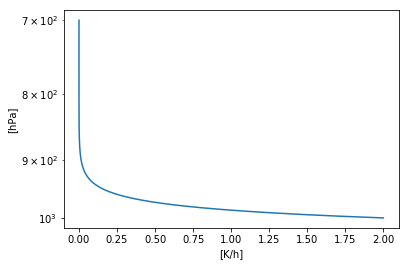

In [23]:
top_pres = 700
p0=1000.
nr_of_boxes = 1000
heating_rate = 2 * np.exp(- 15 * np.linspace(0, 1, nr_of_boxes))  # K/h
delta_p = (p0 - top_pres) / nr_of_boxes
p_mid = np.arange(top_pres + delta_p / 2., p0, delta_p)[::-1]# 
plt.plot(heating_rate, p_mid )  #
plt.xlabel('[K/h]')
plt.ylabel('[hPa]')
plt.yscale('log')
plt.gca().invert_yaxis()

## Exercise 6:
How would you go about adding water vapor to this model? Describe which processes should be included.

## OPTIONAL: Exercicse 8
Finallly, we will make a little film with our model when we add a heating rate. The film should show how temperature and potential temperature changes over time.

To simulate the diurnal variation, multiply the heating rate from the last exercise with a sinus function. E.g. like this:
```python
heating_rate*np.sin(i*timestep/24*2*np.pi)
```
where i is the index (of time). 

Use a timestep of 1 hour, but try to vary the timestep. Run the model for 2 days. Describe what happens. What kind of natural phenomena could this be compared to? What changes when you change the timestep?



In [ ]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
top_pres = 600
nr_of_boxes = 500
# 
heating_rate = 2 * np.exp(- 15 * np.linspace(0, 1, nr_of_boxes))  # K/h
grid = Grid(nr_of_boxes, top_pres)
temperatures = read_in_temp.read_temperatures_and_interpolate_to_grid('temperatures.csv', 
                                                                      Grid(nr_of_boxes, top_pres).p_mid)  

# temperatures
prof = Temperature_profile(nr_of_boxes, top_pres, temperatures=temperatures)

fig, ax = plt.subplots()

ax.set_xlim((225, 400))
ax.set_ylim((min(prof.p_mid), 1000))

lines = []  #
lines.append(plt.semilogy([], [], label=r'$\theta$')[0])
lines.append(plt.semilogy([], [], label='Temp')[0])
plt.legend()
plt.ylabel('[Pa]')
plt.xlabel('[K]')
plt.gca().invert_yaxis()

# temperatures
prof = Temperature_profile(nr_of_boxes, top_pres, temperatures=temperatures)


# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines


# animation function. This is called sequentially
timestep = 1


def animate(i):
    # Calculate theta and temperature for each time step
    # and let x be theta, x2 be temperature and y be pressure


    #y = ??
    #x = ??
    #y2 = ??
    #x2 = ??
    lines[0].set_data(x, y)
    lines[1].set_data(x2, y)
    return lines


# plt.legend()
# call the animator. blit=True means only re-draw the parts that have changed.
nr_of_days = 2
frames = round(24 * nr_of_days / timestep)
interval = 200 * timestep  # Delay between frames in milliseconds
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=interval, blit=True)
HTML(anim.to_html5_video())